# Creating the Dataset

In [10]:
!pip install --upgrade pip
!pip install --upgrade transformers
!pip install --upgrade git+https://github.com/huggingface/accelerate

  Cloning https://github.com/huggingface/accelerate to /tmp/pip-req-build-2zjnnnhg
  Running command git clone --filter=blob:none --quiet https://github.com/huggingface/accelerate /tmp/pip-req-build-2zjnnnhg
  Resolved https://github.com/huggingface/accelerate to commit 0d6a5fa8ee620891b3df8fc70f69694a3d999507
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [11]:
# importing necessary libraries
import torch, os

In [12]:
# installing transformers dataset
!pip install transformers dataset

In [13]:
# using the gpu
from torch import cuda
device = 'cuda' if cuda.is_available() else 'cpu'
device

'cuda'

In [14]:
# loading the dataset
from google.colab import files
texts = files.upload()

Saving Corpus.csv to Corpus.csv


In [16]:
# creating pandas dataframe
import pandas as pd
column_names = ["sentenceID", "text", "author", "year", "genre", "source"]
data = pd.read_csv('Corpus.csv', header=None, sep=';', names=column_names, encoding='utf-8', quoting=3, on_bad_lines='skip')
data = data.sample(frac=1, random_state=42)
data.head()

,sentenceID,text,author,year,genre,source
29253,14-9564,Wie ist die Entwicklung weiterhin geplant?,verschieden,2011,verschieden,Leipzig Corpus
25987,14-6296,Hier sind die höchsten Rohertragsmargen zu erz...,verschieden,2011,verschieden,Leipzig Corpus
10092,8-3703,Andern Tages wissen sie von diesem sonderbaren...,E.T.A. Hoffmann,1817,Prosa,Nachtstuecke
28977,14-9288,Während meines Besuchs wurde ein Kälbchen gebo...,verschieden,2011,verschieden,Leipzig Corpus
19061,13-457,""" ""Sie haben recht, mein Herr"", sagte die Lade...",Theodor Storm,1874,Lyrik,Waldwinkel


In [17]:
data["century"] = 0
for i in range(len(data)):
    data["century"][i] = int(data["year"][i]/100 + 1)
data.head()

<ipython-input-17-864c72d1317b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["century"][i] = int(data["year"][i]/100 + 1)


,sentenceID,text,author,year,genre,source,century
29253,14-9564,Wie ist die Entwicklung weiterhin geplant?,verschieden,2011,verschieden,Leipzig Corpus,21
25987,14-6296,Hier sind die höchsten Rohertragsmargen zu erz...,verschieden,2011,verschieden,Leipzig Corpus,21
10092,8-3703,Andern Tages wissen sie von diesem sonderbaren...,E.T.A. Hoffmann,1817,Prosa,Nachtstuecke,19
28977,14-9288,Während meines Besuchs wurde ein Kälbchen gebo...,verschieden,2011,verschieden,Leipzig Corpus,21
19061,13-457,""" ""Sie haben recht, mein Herr"", sagte die Lade...",Theodor Storm,1874,Lyrik,Waldwinkel,19


In [18]:
data["labels"] = data["author"].apply(lambda x: 1 if x == "Heinrich Heine" else 0)

In [19]:
data.head()

,sentenceID,text,author,year,genre,source,century,labels
29253,14-9564,Wie ist die Entwicklung weiterhin geplant?,verschieden,2011,verschieden,Leipzig Corpus,21,0
25987,14-6296,Hier sind die höchsten Rohertragsmargen zu erz...,verschieden,2011,verschieden,Leipzig Corpus,21,0
10092,8-3703,Andern Tages wissen sie von diesem sonderbaren...,E.T.A. Hoffmann,1817,Prosa,Nachtstuecke,19,0
28977,14-9288,Während meines Besuchs wurde ein Kälbchen gebo...,verschieden,2011,verschieden,Leipzig Corpus,21,0
19061,13-457,""" ""Sie haben recht, mein Herr"", sagte die Lade...",Theodor Storm,1874,Lyrik,Waldwinkel,19,0


In [20]:
heine = data["author"] == "Heinrich Heine"

In [21]:
heine_data = data[heine]
heine_data.head()

,sentenceID,text,author,year,genre,source,century,labels
1921,3-146,nun kommt mein feins Liebchen auch bald,Heinrich Heine,1827,Lyrik,Buch der Lieder,19,1
4569,5-1087,"Man merkte bald, daß solches kein Spaß sei, un...",Heinrich Heine,1832,Prosa,Franzoesische Zustaende,19,1
5665,5-2183,"Daß ich im Julius 1831 mit dem Grafen Moltke, ...",Heinrich Heine,1832,Prosa,Franzoesische Zustaende,19,1
3735,5-253,"Oh, das ist ein sehr großer Narr",Heinrich Heine,1832,Prosa,Franzoesische Zustaende,19,1
4794,5-1312,Die Gegenwart hat sich unterdessen so herbe ge...,Heinrich Heine,1832,Prosa,Franzoesische Zustaende,19,1


In [22]:
modern = data['source'] == "Leipzig Corpus"

In [23]:
modern_data = data[modern]
modern_data.head()

,sentenceID,text,author,year,genre,source,century,labels
29253,14-9564,Wie ist die Entwicklung weiterhin geplant?,verschieden,2011,verschieden,Leipzig Corpus,21,0
25987,14-6296,Hier sind die höchsten Rohertragsmargen zu erz...,verschieden,2011,verschieden,Leipzig Corpus,21,0
28977,14-9288,Während meines Besuchs wurde ein Kälbchen gebo...,verschieden,2011,verschieden,Leipzig Corpus,21,0
20882,14-1191,"Da gibt es viele Unternehmer.""",verschieden,2011,verschieden,Leipzig Corpus,21,0
24505,14-4814,Ein Besucher wurde leicht verletzt.,verschieden,2011,verschieden,Leipzig Corpus,21,0


In [24]:
heine_modern = pd.concat([heine_data, modern_data], ignore_index=True)
heine_modern = heine_modern.sample(frac=1, random_state=42)
heine_modern.head()

,sentenceID,text,author,year,genre,source,century,labels
10189,14-9316,Warum stößt das ab?,verschieden,2011,verschieden,Leipzig Corpus,21,0
6494,14-5051,Ein genaues Datum für Entlastungen gibt es nicht.,verschieden,2011,verschieden,Leipzig Corpus,21,0
4504,5-2095,"Die Republikaner taten Wunder der Tapferkeit, ...",Heinrich Heine,1832,Prosa,Franzoesische Zustaende,19,1
7520,14-4333,Die Stressforschung hat eine Stress-Persönlich...,verschieden,2011,verschieden,Leipzig Corpus,21,0
4230,3-272,ruf ich dir zu,Heinrich Heine,1827,Lyrik,Buch der Lieder,19,1


In [25]:
id2label = {1: "Heinrich Heine", 0: "Nicht-Heine"}
label2id = {"Heinrich Heine": 1, "Nicht-Heine": 0}

In [26]:
heine_modern.labels.value_counts()

0    9998
1    6389
Name: labels, dtype: int64

# Training the Classifier

In [27]:
# importing BERT tokenizer and sequence classifier
from transformers import BertTokenizerFast
tokenizer = BertTokenizerFast.from_pretrained("bert-base-uncased")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [28]:
from transformers import BertForSequenceClassification
model = BertForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=2, id2label=id2label, label2id=label2id)
model.to(device)

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12,

In [29]:
heine_modern = heine_modern.dropna()

In [32]:
# split the data into train, val and test sets
SIZE = heine_modern.shape[0]

train_texts   = list(heine_modern.text[:SIZE//2])
val_texts     = list(heine_modern.text[SIZE//2:(3*SIZE)//4 ])
test_texts    = list(heine_modern.text[(3*SIZE)//4:])

train_labels  = list(heine_modern.labels[:SIZE//2])
val_labels    = list(heine_modern.labels[SIZE//2:(3*SIZE)//4])
test_labels   = list(heine_modern.labels[(3*SIZE)//4:])

In [33]:
len(train_texts), len(val_texts), len(test_texts)

(8193, 4097, 4097)

In [34]:
# Is the train data balanced?
heine_modern[:8193].labels.value_counts()

0    4992
1    3201
Name: labels, dtype: int64

<Axes: ylabel='labels'>

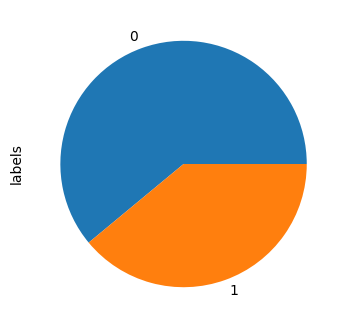

In [35]:
heine_modern.labels.value_counts().plot(kind="pie", figsize=(4,4))

In [36]:
heine_modern[:8193].author.value_counts()

verschieden       4992
Heinrich Heine    3201
Name: author, dtype: int64

<Axes: ylabel='author'>

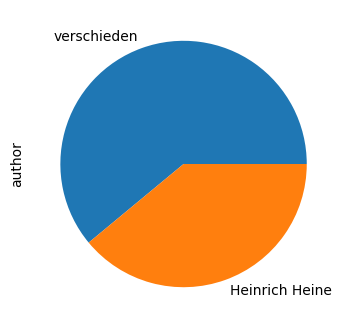

In [38]:
heine_modern.author.value_counts().plot(kind="pie", figsize=(4,4))

In [39]:
# encode the texts
train_encodings = tokenizer(train_texts, truncation=True, padding=True)
val_encodings  = tokenizer(val_texts, truncation=True, padding=True)
test_encodings = tokenizer(test_texts, truncation=True, padding=True)

In [40]:
from torch.utils.data import Dataset
class MyDataset(Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels
    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item
    def __len__(self):
        return len(self.labels)

In [41]:
train_dataset = MyDataset(train_encodings, train_labels)
val_dataset = MyDataset(val_encodings, val_labels)
test_dataset = MyDataset(test_encodings, test_labels)

In [42]:
# import trainer class
from transformers import TrainingArguments, Trainer

In [43]:
# define the metrics
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)
    precision, recall, f1, _ = precision_recall_fscore_support(labels, preds, average='macro')
    acc = accuracy_score(labels, preds)
    return {
        'Accuracy': acc,
        'F1': f1,
        'Precision': precision,
        'Recall': recall
    }

In [44]:
# setup of the trainer
training_args = TrainingArguments(
    # The output directory where the model predictions and checkpoints will be written
    output_dir= './HeinrichT_modern',
    do_train=True,
    do_eval=True,
    #  The number of epochs, defaults to 3.0
    num_train_epochs=5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=32,
    # Number of steps used for a linear warmup
    warmup_steps=100,
    weight_decay=0.01,
    logging_strategy='steps',
    # TensorBoard log directory
    logging_dir='./multi-class-logs',
    logging_steps=50,
    evaluation_strategy="steps",
    eval_steps=50,
    save_strategy="steps",
    fp16=True,
    load_best_model_at_end=True
)

In [45]:
# Initializing the trainer class
trainer = Trainer(
    # the pre-trained model that will be fine-tuned
    model=model,
    # training arguments that we defined above
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    compute_metrics= compute_metrics
)

In [46]:
# Train/fine-tune the BERT classifier
trainer.train()

Step,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
50,0.413800,0.121879,0.992433,0.992093,0.993773,0.990543
100,0.027000,0.004015,0.999268,0.999237,0.999390,0.999085
150,0.028900,0.007925,0.999024,0.998983,0.999188,0.998780
200,0.006500,0.002579,0.999512,0.999491,0.999593,0.999390
250,0.000200,0.003388,0.999512,0.999491,0.999593,0.999390
300,0.022200,0.049324,0.991701,0.991325,0.993178,0.989628
350,0.012100,0.018918,0.997803,0.997714,0.997269,0.998169
400,0.000100,0.014930,0.998291,0.998222,0.997874,0.998576
450,0.015600,0.000069,1.000000,1.000000,1.000000,1.000000
500,0.000100,0.000048,1.000000,1.000000,1.000000,1.000000


TrainOutput(global_step=2565, training_loss=0.012565411217728554, metrics={'train_runtime': 2527.9384, 'train_samples_per_second': 16.205, 'train_steps_per_second': 1.015, 'total_flos': 7683780663535500.0, 'train_loss': 0.012565411217728554, 'epoch': 5.0})

In [47]:
# Return a table with the scores
q=[trainer.evaluate(eval_dataset=data) for data in [train_dataset, val_dataset, test_dataset]]
pd.DataFrame(q, index=["train","val","test"]).iloc[:,:5]

,eval_loss,eval_Accuracy,eval_F1,eval_Precision,eval_Recall
train,0.000015,1.000000,1.000000,1.000000,1.000000
val,0.000015,1.000000,1.000000,1.000000,1.000000
test,0.002276,0.999756,0.999741,0.999677,0.999804


# Testing the Model

In [48]:
# define predict function to test the classifier on test data
def predict(text):
    inputs = tokenizer(text, padding=True, truncation=True, return_tensors="pt").to("cuda")
    outputs = model(**inputs)
    probs = outputs[0].softmax(1)
    return model.config.id2label[probs.argmax().item()]

## Heine's contemporaries

In [52]:
zeitgenossen = (data['century'] < 20) & (data['author'] != "Heinrich Heine")

In [56]:
zeitgenossen_data = data[zeitgenossen]
zeitgenossen_data = zeitgenossen_data.reset_index()
zeitgenossen_data.head()

,index,sentenceID,text,author,year,genre,source,century,labels
0,10092,8-3703,Andern Tages wissen sie von diesem sonderbaren...,E.T.A. Hoffmann,1817,Prosa,Nachtstuecke,19,0
1,19061,13-457,""" ""Sie haben recht, mein Herr"", sagte die Lade...",Theodor Storm,1874,Lyrik,Waldwinkel,19,0
2,19016,13-412,Sie lachte auf,Theodor Storm,1874,Lyrik,Waldwinkel,19,0
3,8282,8-1893,"Aber oft kam es, daß eine stärker berührte Sai...",E.T.A. Hoffmann,1817,Prosa,Nachtstuecke,19,0
4,14272,11-248,"Das vorige war auch nicht besser""",J.W. von Goethe,1774,Prosa,Die Leiden des jungen Werthers,18,0


In [57]:
zeitgenossen_data.author.value_counts()

E.T.A. Hoffmann    7635
J.W. von Goethe    4580
Theodor Storm      1087
Name: author, dtype: int64

In [58]:
# predict the label of the sentences
predictions = []

for i in range(len(zeitgenossen_data["text"])):
    prediction = predict(zeitgenossen_data["text"][i])
    predictions.append(prediction)

In [59]:
# the label should be Nicht-Heine (0) since none of them were written by Heinrich Heine
from collections import Counter

counter = Counter(predictions)
most_frequent = counter.most_common(2)

print(most_frequent)

[('Heinrich Heine', 13285), ('Nicht-Heine', 17)]


Most of the sentences were wrongly recognized as Heinrich Heine. It seems that the classifier only recognizes new vs. old texts.

## Fake Heine (ChatGPT)

In [60]:
# loading the test dataset
test = files.upload()

Saving TestData.csv to TestData.csv


In [62]:
# creating pandas dataframe
import pandas as pd
col_names = ["sentenceID", "text", "author", "year", "genre", "source"]
test_data = pd.read_csv('TestData.csv', header=None, sep=';', names=col_names, encoding='utf-8', quoting=3, on_bad_lines='skip')
test_data["century"] = 0
for i in range(len(test_data)):
    test_data["century"][i] = int(test_data["year"][i]/100 + 1)
test_data["labels"] = test_data["author"].apply(lambda x: 1 if x == "Heinrich Heine" else 0)
test_data.head()

<ipython-input-62-52f055999163>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data["century"][i] = int(test_data["year"][i]/100 + 1)


,sentenceID,text,author,year,genre,source,century,labels
0,0-0,"In einer Kutsche lang und schwer, Durch Hügel,...",ChatGPT,2023,Lyrik,Gedicht 1 (lange Kutschenfahrt Richtung Düssel...,21,0
1,0-1,"Die Räder knarren, Leder quietscht, Ein Hauch ...",ChatGPT,2023,Lyrik,Gedicht 1 (lange Kutschenfahrt Richtung Düssel...,21,0
2,0-2,"Die Sonne neigt sich, malerisch rot, Über Hüge...",ChatGPT,2023,Lyrik,Gedicht 1 (lange Kutschenfahrt Richtung Düssel...,21,0
3,0-3,"Im Kutschenschlag ein sanfter Ton, Vom Rausche...",ChatGPT,2023,Lyrik,Gedicht 1 (lange Kutschenfahrt Richtung Düssel...,21,0
4,0-4,"Durch Orte klein, durch Wälder tief, Zieht sti...",ChatGPT,2023,Lyrik,Gedicht 1 (lange Kutschenfahrt Richtung Düssel...,21,0


In [63]:
# predict the label of the sentences
predictions2 = []

for i in range(len(test_data["text"])):
    prediction2 = predict(test_data["text"][i])
    predictions2.append(prediction2)

In [66]:
# the label should be Nicht-Heine (0) since none of them were written by Heinrich Heine
from collections import Counter

counter2 = Counter(predictions2)
most_frequent2 = counter2.most_common(2)

print(most_frequent2)

[('Heinrich Heine', 194)]


All of the sentences generated by ChatGPT were wrongly recognized as Heinrich Heine.